In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import math

In [3]:
# Load the TSV file, using header=None since there is no header row
df_train = pd.read_csv('Car_TRAIN.tsv', sep='\t', header=None)
df_test = pd.read_csv('Car_TEST.tsv', sep='\t', header=None)

In [4]:
#  Separate labels and data of train 
labels_train = df_train.iloc[:, 0].values        
data_train = df_train.iloc[:, 1:]     
print("train Labels shape:", labels_train.shape)
print("train Data shape: ", data_train.shape)

train Labels shape: (60,)
train Data shape:  (60, 577)


In [5]:
#  Separate labels and data of test 
labels_test = df_test.iloc[:, 0].values        
data_test = df_test.iloc[:, 1:]     
print("test Labels shape:", labels_test.shape)
print("test Data shape: ", data_test.shape)

test Labels shape: (60,)
test Data shape:  (60, 577)


In [6]:
#  Verify there are no missing values
print("\nAny missing values in the train dataset?", data_train.isnull().any().any())
print("\nAny missing values in the test dataset?", data_test.isnull().any().any())


Any missing values in the train dataset? False

Any missing values in the test dataset? False


In [7]:
print(data_train.head())
print(data_test.head())

        1         2         3         4         5         6         7    \
0  1.654107  1.621582  1.589211  1.557358  1.525398  1.493311  1.483532   
1  1.750569  1.710457  1.670466  1.630688  1.616339  1.611841  1.607774   
2  1.551691  1.517339  1.481993  1.445524  1.441751  1.426236  1.390641   
3  1.495626  1.457534  1.431099  1.429687  1.428633  1.427785  1.393253   
4  1.713808  1.675160  1.650911  1.646261  1.613406  1.575549  1.537942   

        8         9         10   ...       568       569       570       571  \
0  1.483766  1.455129  1.423884  ...  1.675778  1.672432  1.669461  1.666592   
1  1.619430  1.650838  1.626347  ...  1.493342  1.527729  1.562123  1.596534   
2  1.385668  1.385117  1.384878  ...  1.313590  1.315309  1.345369  1.378141   
3  1.357073  1.320893  1.284713  ...  1.265309  1.225467  1.215470  1.248229   
4  1.547532  1.578335  1.612165  ...  1.408620  1.441860  1.475111  1.502538   

        572       573       574       575       576       577  
0  1

Plotting sample idx = 0


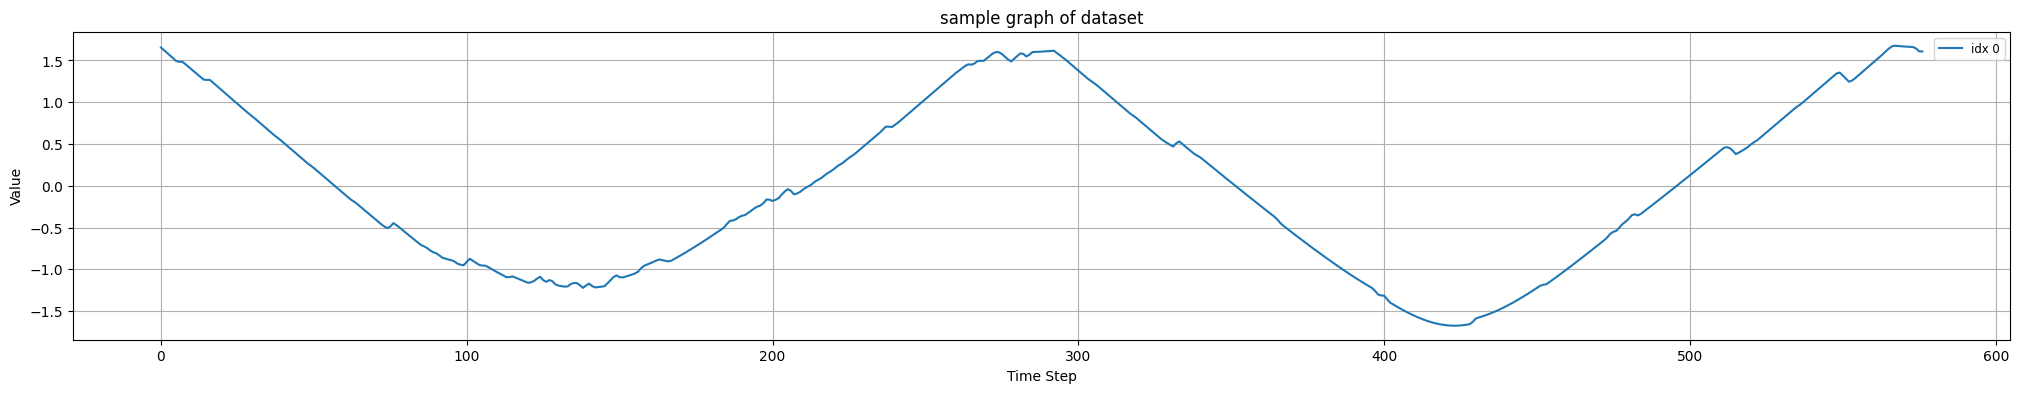

In [8]:
plt.figure(figsize=(25, 4))
count = 0
for i in range(len(labels_train)):
    if labels_train[i] == 1:
        print(f"Plotting sample idx = {i}")
        plt.plot(data_train.iloc[i].values,label=f"idx {i}")
        count += 1
        if count == 1:
            break
plt.title("sample graph of dataset")
plt.xlabel("Time Step")
plt.ylabel("Value")
plt.legend(loc="upper right", fontsize="small")
plt.grid(True)
plt.show()

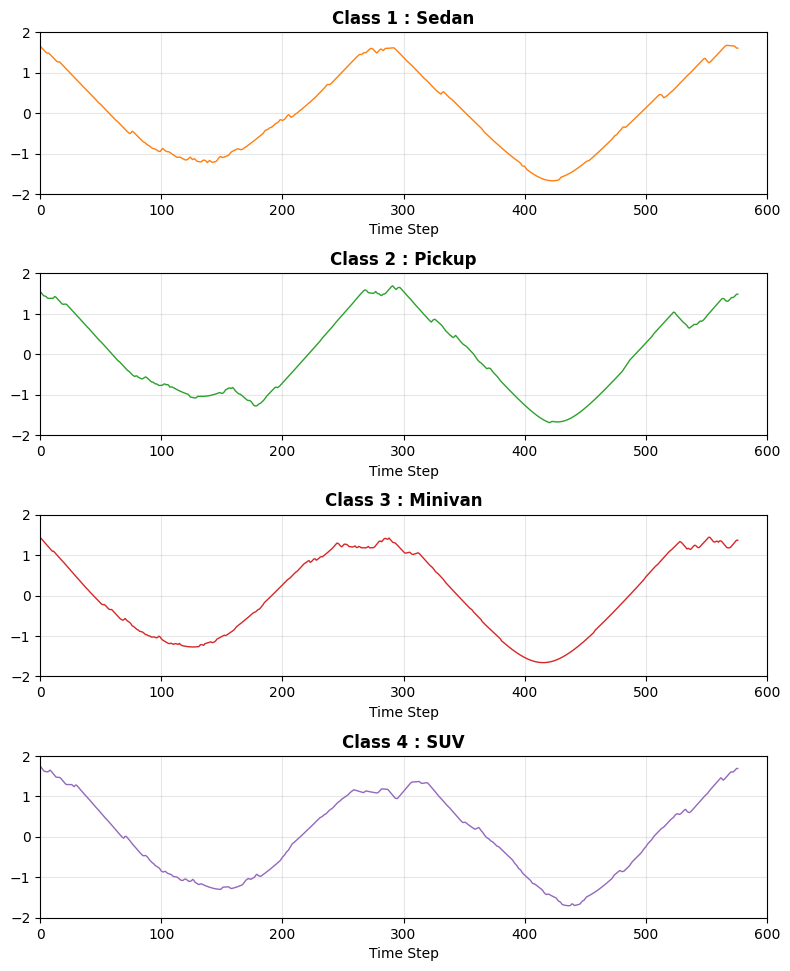

In [9]:
# Map numeric labels to human-readable names
class_names = {
    1: "Sedan",
    2: "Pickup",
    3: "Minivan",
    4: "SUV"
}

colors = plt.cm.tab10.colors
ticks = np.arange(0, 601, 100)

fig, axes = plt.subplots(5, 1, figsize=(8, 12), sharex=False)

for cls, ax in zip(range(5), axes):
    # find the first example of this class
    idxs = np.where(labels_train == cls)[0]
    if len(idxs) == 0:
        ax.set_visible(False)
        continue
    idx = idxs[0]
    series = data_train.iloc[idx].values

    # plot
    ax.plot(series, color=colors[cls], linewidth=1)

    # X-axis ticks and labels on every subplot
    ax.set_xticks(ticks)
    ax.set_xticklabels(ticks)
    ax.set_xlim(0, 600)

    # Y-axis symmetric limit
    max_abs = max(abs(series.min()), abs(series.max()))
    if max_abs <= 5:
        y_lim = math.ceil(max_abs)
    else:
        y_lim = math.ceil(max_abs / 5) * 5
    ax.set_ylim(-y_lim, y_lim)

    # Title centered
    ax.set_title(f"Class {cls} : {class_names[cls]}", fontsize=12, fontweight="bold")
    ax.grid(True, alpha=0.3)

# Add a shared X label underneath all subplots
for ax in axes:
    ax.set_xlabel("Time Step")

plt.tight_layout(h_pad=1.0)
plt.savefig("Car_graph.pdf", bbox_inches='tight')
plt.show()

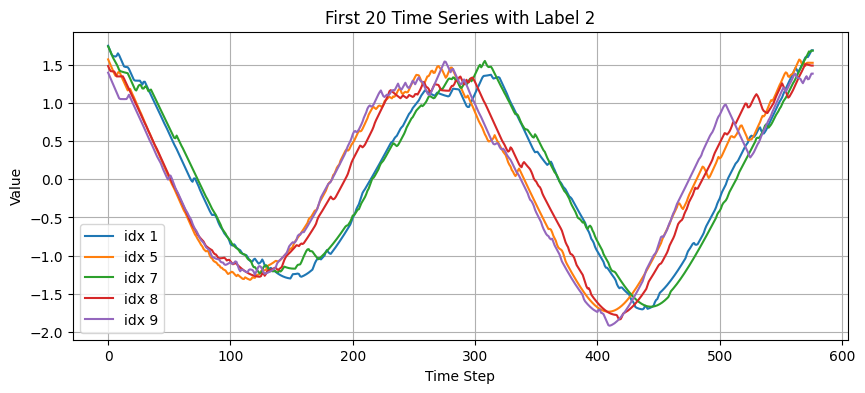

In [11]:
plt.figure(figsize=(10, 4))
count = 0
for i in range(len(labels_train)):
    if labels_train[i] == 4:
        plt.plot(data_train.iloc[i].values, label=f"idx {i}")
        count += 1
        if count == 5:
            break
plt.title("First 20 Time Series with Label 2")
plt.xlabel("Time Step")
plt.ylabel("Value")
plt.legend()
plt.grid()
plt.show()

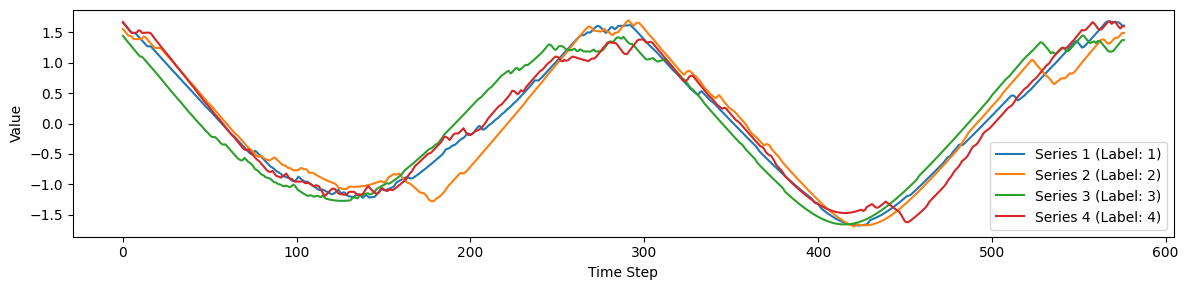

In [12]:
P = data_train.iloc[0].values
q = data_train.iloc[2].values
r = data_train.iloc[12].values
s = data_train.iloc[18].values
first_label = labels_train[0]
second_label = labels_train[2]
third_label = labels_train[12]
fourth_label = labels_train[18]
plt.figure(figsize=(12, 3))
plt.plot(P, label=f"Series 1 (Label: {first_label})")
plt.plot(q, label=f"Series 2 (Label: {second_label})")
plt.plot(r, label=f"Series 3 (Label: {third_label})")
plt.plot(s, label=f"Series 4 (Label: {fourth_label})")
plt.xlabel("Time Step")
plt.ylabel("Value")
plt.legend()
plt.tight_layout()
plt.show()